In [56]:

import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
editions=pd.read_csv("SOM_EDITIONS.tsv" , sep='\t' )
editions.head()

,Edition,Bronze,Gold,Silver,Grand Total,City,Country
0,1896,40,64,47,151,Athens,Greece
1,1900,142,178,192,512,Paris,France
2,1904,123,188,159,470,St. Louis,United States
3,1908,211,311,282,804,London,United Kingdom
4,1912,284,301,300,885,Stockholm,Sweden


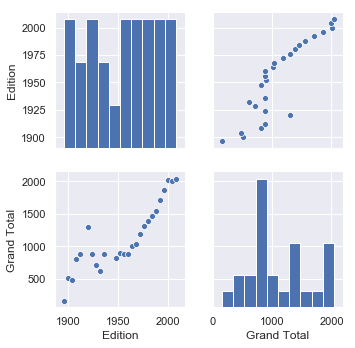

In [57]:
sns.set(color_codes=True)
sns.pairplot(editions, kind="scatter", palette="Set2")

C:\Users\lucky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1440x1800 with 0 Axes>

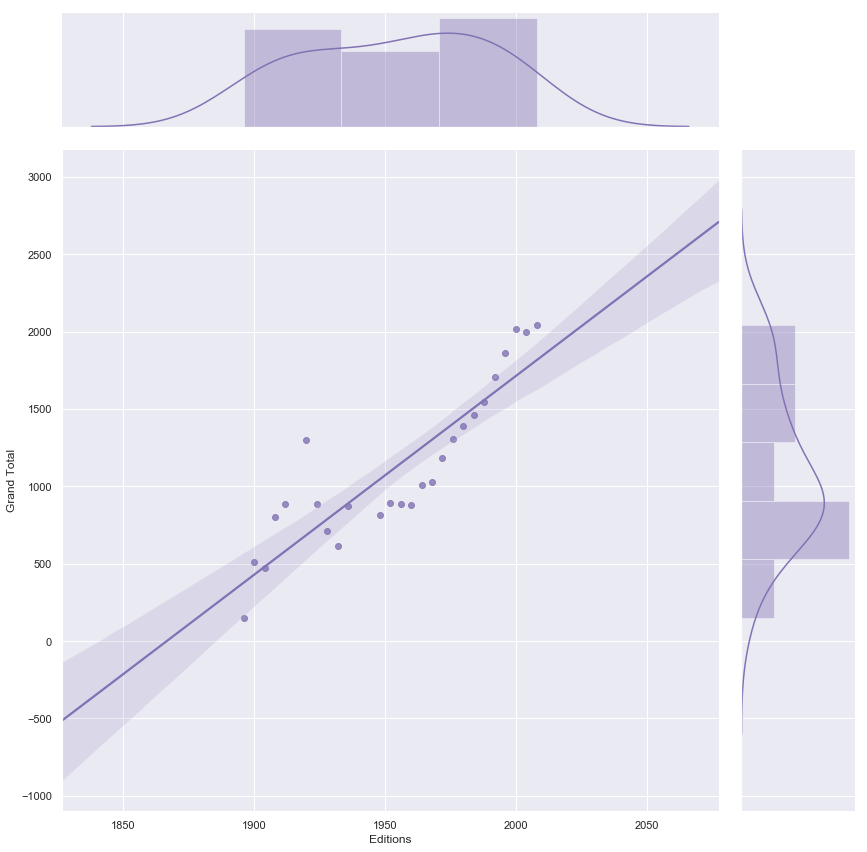

In [67]:
plt.figure(figsize=(20,25))
sns.jointplot(x="Edition", y=editions['Grand Total'], data=editions, kind="reg", height=12,color='m')
plt.xlabel("Editions")
plt.show()

Text(0.5,1,'General Statistics of Admissions')

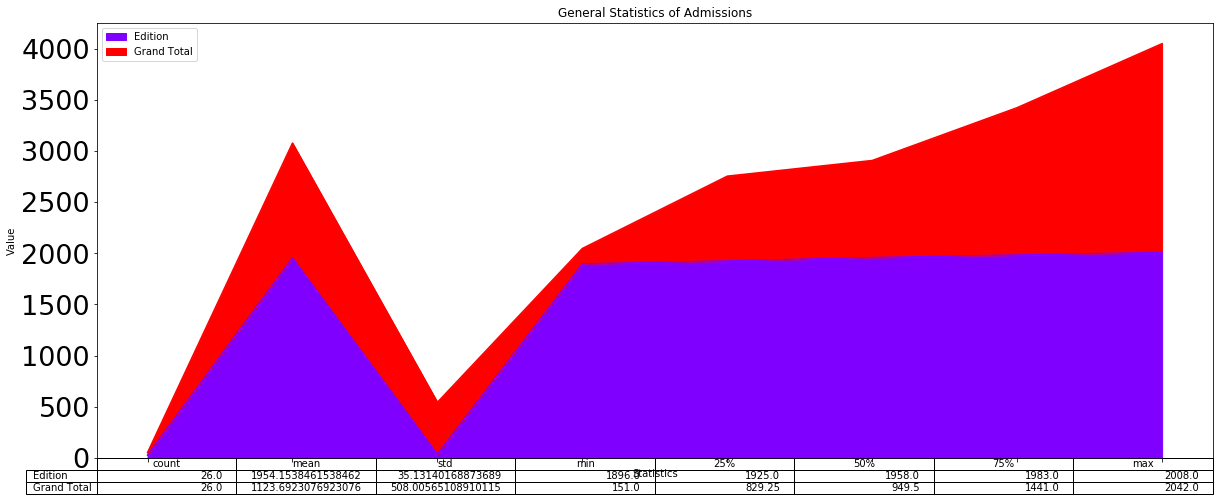

In [53]:
editions.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Olympic medals")

In [6]:
editions=editions[['Edition','Grand Total','City','Country']]
editions.head(26)

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden
5,1920,1298,Antwerp,Belgium
6,1924,884,Paris,France
7,1928,710,Amsterdam,Netherlands
8,1932,615,Los Angeles,United States
9,1936,875,Berlin,Germany


In [7]:
editions.to_csv("ex1a_eval.csv")

In [8]:
ioc_codes= pd.read_csv( "IOC_COUNTRY_CODES.csv")
ioc_codes.head()

,Country,NOC,ISO code
0,Afghanistan,AFG,AF
1,Albania,ALB,AL
2,Algeria,ALG,DZ
3,American Samoa*,ASA,AS
4,Andorra,AND,AD


In [9]:
#ioc_codes.head()
ioc_codes=ioc_codes[['Country','NOC']]
ioc_codes.head()


,Country,NOC
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [14]:

df2=pd.read_csv('ALL_MEDALISTS.tsv', sep='\t')
df2.head()



,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


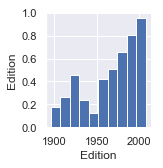

In [58]:
sns.set(color_codes=True)
sns.pairplot(df2, kind="scatter", palette="Set2")

Text(0.5,1,'General Statistics')

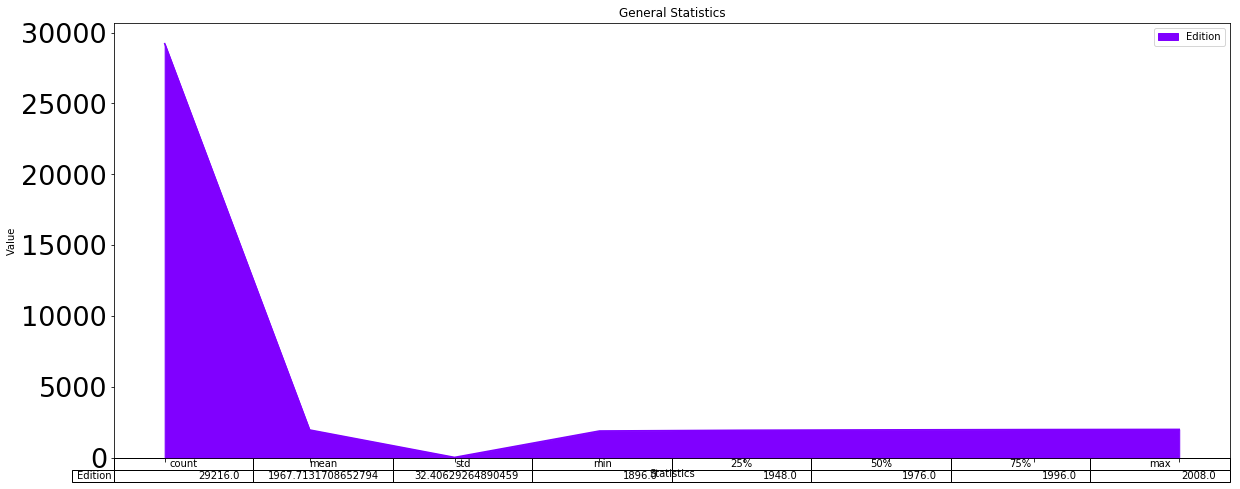

In [55]:
df2.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics")

In [17]:
df3=df2
for i in range (1896,2012,4):
    ma=df2['Edition']==i
    df3=df2[ma]
    #print(df3)
    s=str(i)
    df3.to_csv('summer_'+s+'.csv',sep=',')
    
    



In [26]:
medals_dict={}
for year in editions['Edition']:
    file_path = 'summer_{:d}.csv'.format(year)
    #file_path=pd.read_csv('summer_'+year+'.csv',sep=',')
    #print(years)
    medals_dict[year]= pd.read_csv(file_path)
    medals_dict[year] = medals_dict[year][['Athlete', 'NOC', 'Medal']]
    medals_dict[year]['Edition'] = year
    #print(medal_dict)
    
    # Concatenate medals_dict: medals
    medals = pd.concat(medals_dict, ignore_index=True)
    #print(medals.head())
    #print(medals.tail())
medals.head(5)
    
    
    
    
    

,Athlete,NOC,Medal,Edition
0,"HAJOS, Alfred",HUN,Gold,1896
1,"HERSCHMANN, Otto",AUT,Silver,1896
2,"DRIVAS, Dimitrios",GRE,Bronze,1896
3,"MALOKINIS, Ioannis",GRE,Gold,1896
4,"CHASAPIS, Spiridon",GRE,Silver,1896


In [28]:
medal_counts = medals.pivot_table(aggfunc='count', index='Edition', values='Athlete', columns='NOC')

# Print the first & last 5 rows of medal_counts
medal_counts.head()
#print(medal_counts.tail())
#medal_counts.to_csv("ex1d_eval.csv")

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis='rows')

# Print first & last 5 rows of fractions
print(fractions.head(5))
fractions.tail()
fractions.to_csv("ex1e_eval.csv")

NOC      AFG  AHO  ALG       ANZ  ARG  ARM       AUS       AUT  AZE  BAH  \
Edition                                                                    
1896     NaN  NaN  NaN       NaN  NaN  NaN  0.013245  0.033113  NaN  NaN   
1900     NaN  NaN  NaN       NaN  NaN  NaN  0.009766  0.011719  NaN  NaN   
1904     NaN  NaN  NaN       NaN  NaN  NaN       NaN  0.002128  NaN  NaN   
1908     NaN  NaN  NaN  0.023632  NaN  NaN       NaN  0.001244  NaN  NaN   
1912     NaN  NaN  NaN  0.011299  NaN  NaN       NaN  0.015819  NaN  NaN   

NOC        ...     URS  URU       USA  UZB  VEN  VIE  YUG  ZAM  ZIM       ZZX  
Edition    ...                                                                 
1896       ...     NaN  NaN  0.132450  NaN  NaN  NaN  NaN  NaN  NaN  0.039735  
1900       ...     NaN  NaN  0.107422  NaN  NaN  NaN  NaN  NaN  NaN  0.066406  
1904       ...     NaN  NaN  0.838298  NaN  NaN  NaN  NaN  NaN  NaN  0.017021  
1908       ...     NaN  NaN  0.078358  NaN  NaN  NaN  NaN  NaN  NaN

In [31]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change() * 100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

# Print first & last 5 rows of fractions_change
fractions_change.head()
fractions_change.tail()
#fractions_change.to_csv("ex1f_eval.csv")

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
21,1992,NaN,0.0,-7.214076,0.0,-6.767308,NaN,2.754114,-3.034840,NaN,...,0.0,0.000000,-1.329330,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.0
22,1996,NaN,0.0,8.959211,0.0,1.306696,NaN,10.743275,-3.876773,NaN,...,0.0,0.000000,-1.010378,NaN,0.000000,NaN,-2.667732,-10.758472,0.000000,0.0
23,2000,NaN,0.0,19.762488,0.0,0.515190,-26.935484,12.554986,-3.464221,88.387097,...,0.0,-12.025323,-1.341842,42.258065,0.000000,NaN,-2.696445,0.000000,0.000000,0.0
24,2004,NaN,0.0,0.000000,0.0,9.625365,0.000000,8.161162,-2.186922,48.982144,...,0.0,0.000000,-1.031922,21.170339,-1.615969,0.000000,0.000000,0.000000,-43.491929,0.0
25,2008,NaN,0.0,-8.197807,0.0,8.588555,91.266408,6.086870,-3.389836,31.764436,...,0.0,0.000000,-0.450031,14.610625,-6.987342,-0.661117,0.000000,0.000000,-23.316533,0.0


In [42]:
# Import pandas
import pandas as pd

# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how='left')

# Extract relevant columns and set index: hosts
hosts = hosts[['Edition','NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()
hosts.to_csv("ex1g_eval.csv")
# Print hosts
hosts.head()

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN


,Edition,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE


In [43]:
# Import pandas
import pandas as pd

# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped.loc[reshaped.NOC == 'CHN']

# Print last 5 rows of chn with .tail()
#print(chn.tail())
chn.to_csv("ex1h_eval.csv")

(3588, 3) (26, 139)


In [49]:
# Import pandas
import pandas as pd

# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts, how='inner')

# Print first 5 rows of merged
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

# Print first 5 rows of influence
print(influence.head())
influence.to_csv("ex1i_eval.csv")

   Edition  NOC     Change
0     1956  AUS  54.615063
1     2000  AUS  12.554986
2     1920  BEL  54.757887
3     1976  CAN  -2.143977
4     2008  CHN  13.251332
         NOC      Change
Edition                 
1896     GRE         NaN
1900     FRA  198.002486
1904     USA  199.651245
1908     GBR  134.489218
1912     SWE   71.896226


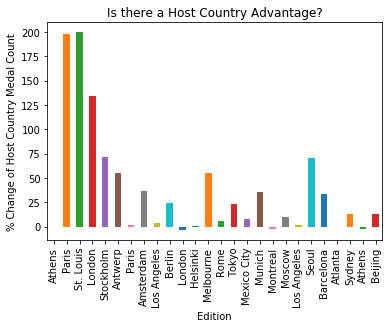

In [52]:
# Import pyplot
import matplotlib.pyplot as plt

# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()
#plt.savefig('scatter_matrix.jpeg')
